In [1]:
# Importing Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data (train.csv)
data = pd.read_csv('../datasets/train.csv')
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


# DATA INFO

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


# UNDERSTANDING NUMERICAL DATA

In [5]:
# Selecting only numerical features from the dataset
num_data = data.select_dtypes(include=np.number)
num_data.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
0,0,37,35000,0.0,6000,11.49,0.17,14,0
1,1,22,56000,6.0,4000,13.35,0.07,2,0
2,2,29,28800,8.0,6000,8.90,0.21,10,0
3,3,30,70000,14.0,12000,11.11,0.17,5,0
4,4,22,60000,2.0,6000,6.92,0.10,3,0


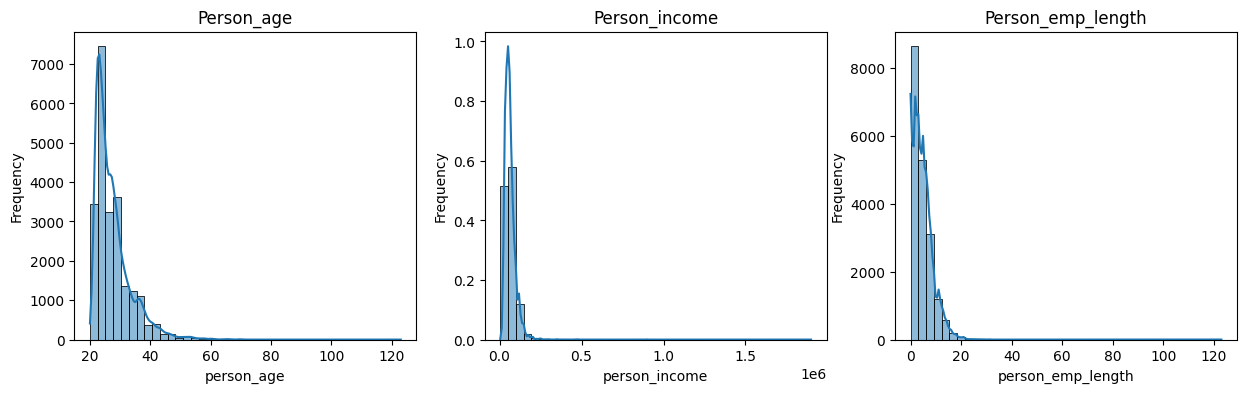

In [6]:
# Plotting Histograms To Study Their Distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(data=num_data['person_age'], stat='frequency', bins=40, kde=True, ax=axes[0])
axes[0].set_title('Person_age')
sns.histplot(data=num_data['person_income'], stat='frequency', bins=40, kde=True, ax=axes[1])
axes[1].set_title('Person_income')
sns.histplot(data=num_data['person_emp_length'], stat='frequency', bins=40, kde=True, ax=axes[2])
axes[2].set_title('Person_emp_length')
plt.show()

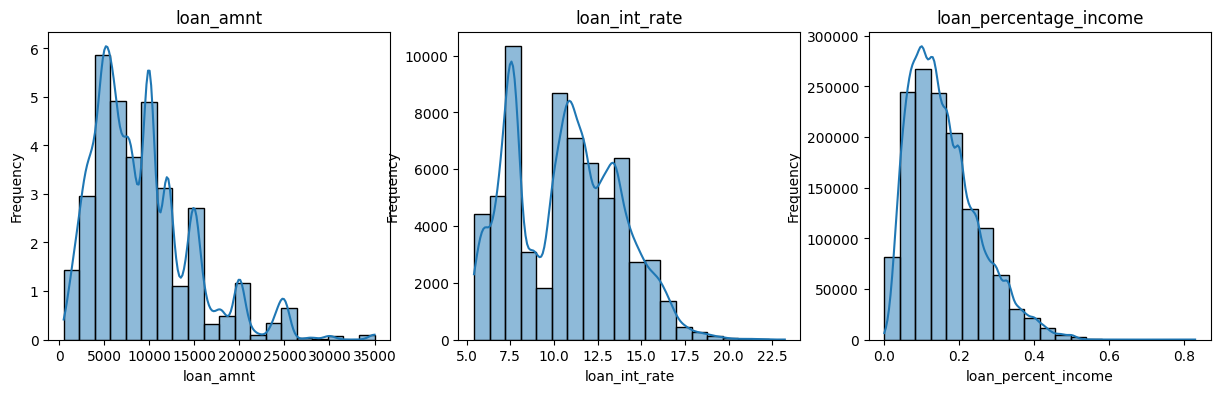

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(data=num_data['loan_amnt'], stat='frequency', kde=True, bins=20, ax=axes[0])
axes[0].set_title('loan_amnt')
sns.histplot(data=num_data['loan_int_rate'], stat='frequency', kde=True, bins=20, ax=axes[1])
axes[1].set_title('loan_int_rate')
sns.histplot(data=num_data['loan_percent_income'], stat='frequency', kde=True, bins=20, ax=axes[2])
axes[2].set_title('loan_percentage_income')
plt.show()

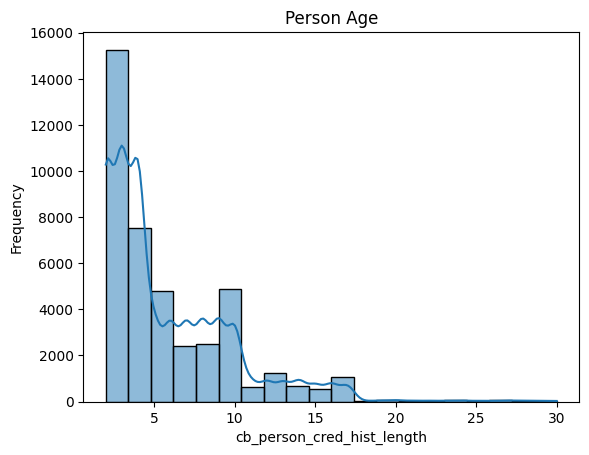

In [8]:
sns.histplot(data=num_data['cb_person_cred_hist_length'], stat='frequency', bins=20, kde=True)
plt.title('Person Age')
plt.show()

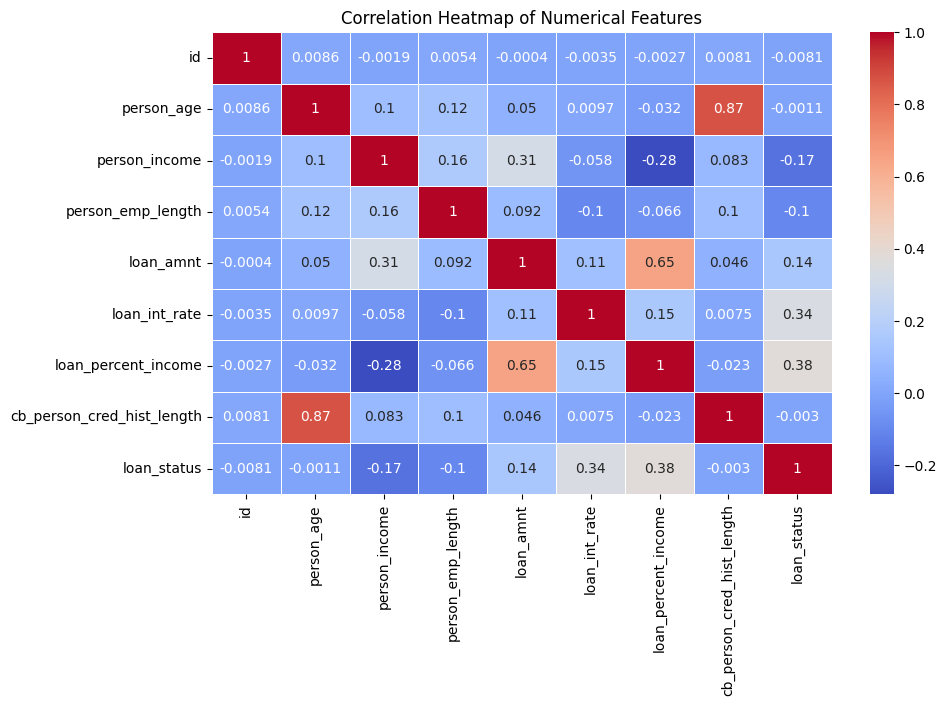

In [13]:
# Studying Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

C:\Users\deusm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  from_comp_data=True,


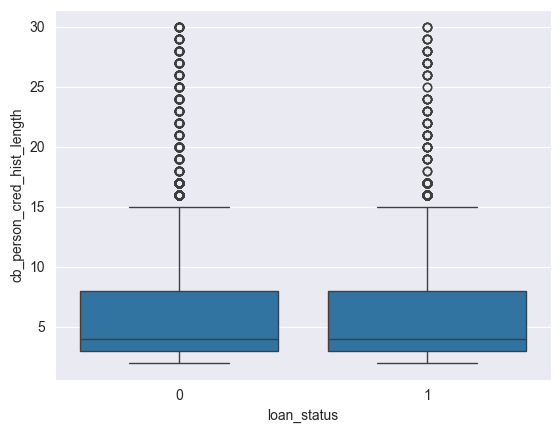

In [55]:
# Analysing Outliers
sns.boxplot(x=num_data['loan_status'], y=num_data['cb_person_cred_hist_length'])
plt.show()